<a href="https://colab.research.google.com/github/NamanNavneet/MINI-PROJECT/blob/main/Image_Classification_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install bing-image-downloader

In [3]:
!mkdir images

In [4]:
from bing_image_downloader import downloader
downloader.download("humans",limit=50,output_dir="images",adult_filter_off=True)

[%] Downloading Images to /content/images/humans


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://images.amcnetworks.com/amc.com/wp-content/uploads/2015/06/humans-season-2-niska-berrington-800x600.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/12cbb689447369.5df4d3f4046d1.jpeg
[Error]Invalid image, not saving https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/12cbb689447369.5df4d3f4046d1.jpeg

[!] Issue getting: https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/12cbb689447369.5df4d3f4046d1.jpeg
[!] Error:: Invalid image, not saving https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/12cbb689447369.5df4d3f4046d1.jpeg

[%] Downloading Image #2 from https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/d7f6bf89447369.5df4d759b0d01.jpeg
[Error]Invalid image, not saving https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/d7f6bf89447369.5df4

In [5]:
downloader.download("animals",limit=50,output_dir="images",adult_filter_off=True)

[%] Downloading Images to /content/images/animals


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://truebutweird.weebly.com/uploads/1/3/1/7/13176144/619875391.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-iJTtjEwzBEw/UA13lFpdrDI/AAAAAAAABeI/8nLwivOo95Y/s1600/Giraffe-wild-animals-2614055-1024-818.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://media.techeblog.com/images/quokka.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://pawpawgo.com/wp-content/uploads/2019/12/Beautiful-Wild-Animals-The-True-Beauty-Of-Wildlife-1706572629015258180.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://pawpawgo.com/wp-content/uploads/2019/12/Beautiful-Wild-Animals-The-True-Beauty-Of-Wildlife-1566186984402498668.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i0.wp.com/www.ecstasycoffee.com/wp-content/uploads/2014/12/Meerkats.jpg?resize=750%2C1124&amp;ssl=1
[%] F

In [6]:
downloader.download("machines",limit=50,output_dir="images",adult_filter_off=True)

[%] Downloading Images to /content/images/machines


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.allellipticals.com/images/TRUE-M50-elliptical.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gympros.com/wp-content/uploads/2019/05/TRUE-FITNESS-LEG-CALF-PRESS.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/0b/20/89/0b20896825907a78f72aec1412347b57--vending-machine-glass.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://fitness4home.com/wp-content/uploads/2014/01/cs400e_model2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.gympros.com/wp-content/uploads/2019/05/TRUE-FITNESS-FORCE-MULTI-PRESS.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.fitnessgallery.com/wp-content/uploads/2016/12/TRUE-Fitness_ES700-Elliptical-Back_Fitness-Gallery.png
[%] File Downloaded !

[%] Downloading Image #7 from https://duplex-cleaning.com/wp-con

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/images'

categories = ['humans','animals','machines']
target = []
images= []
flat_data = []

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [8]:
flat_data[0]

array([0.49236601, 0.49236601, 0.50696732, ..., 0.32896732, 0.29824837,
       0.27097821])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.30, random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       2])

In [12]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.6888888888888889

In [18]:
confusion_matrix(y_pred,y_test)

array([[16,  4,  2],
       [ 2,  9,  5],
       [ 1,  0,  6]])

In [19]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [20]:
model = pickle.load(open('img_model.p','rb'))

Enter your data:https://i.natgeofe.com/n/bec7bd50-0d57-4982-aeb5-82e5f8184f89/02-machine-saving-animals-nationalgeographic_1977490.jpg
(2048, 3072, 3)
predicted output:animals


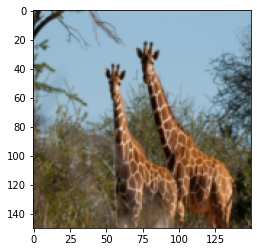

In [21]:
flat_data = []
url = input("Enter your data:")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'predicted output:{y_out}')